In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
#importing seaborn for statistical plots
import seaborn as sns
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# calculate accuracy measures and confusion matrix
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
colnames = ['class', 'Alch', 'mallic', 'Ash', 'Alk_Ash', 
            'Magn', 'Tot_phenols', 'Flav', 'NFP','PAC','color',
            'Hue','OD','Proline']
A=pd.read_csv("wine.xls",names=colnames)

In [5]:
A.corr()

,class,Alch,mallic,Ash,Alk_Ash,Magn,Tot_phenols,Flav,NFP,PAC,color,Hue,OD,Proline
class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alch,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
mallic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alk_Ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magn,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Tot_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flav,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
NFP,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
PAC,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [15]:
X=A.drop('class',axis=1)
X1=A.drop(['class','Ash'],axis=1)
X2=A.drop(['class','Ash','Magn','color'],axis=1)
Y=A['class']


In [16]:
from sklearn import metrics
from sklearn.model_selection import KFold

In [19]:
kf=KFold(n_splits=3,shuffle=True,random_state=2)
acc=[]
for train,test in kf.split(X2,Y):
    Xtrain,Xtest=X2.iloc[train,:],X2.iloc[test,:]
    Ytrain,Ytest=Y.iloc[train],Y.iloc[test]
    model=LogisticRegression()
    model.fit(Xtrain,Ytrain)
    Y_predict=model.predict(Xtest)
    acc.append(metrics.accuracy_score(Ytest,Y_predict))
print(acc)
print("Cross_Validated_Accuracy_score: %0.03f (+/- %0.5f)" % (np.mean(acc),np.var(acc,ddof=1)))   

[0.9166666666666666, 0.8813559322033898, 0.9322033898305084]
Cross_Validated_Accuracy_score: 0.910 (+/- 0.00068)


/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda/python3/lib/python3.6/site-package

In [30]:
X_scaled=preprocessing.scale(X1)
X_scaled=pd.DataFrame(X_scaled,columns=X1.columns)#scaled full data frame

/usr/local/anaconda/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [35]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=2)

In [39]:
model=LogisticRegression()
model.fit(Xtrain,Ytrain)
ypred=model.predict(Xtest)
acc=metrics.accuracy_score(Ytest,ypred)
cm=metrics.confusion_matrix(Ytest,ypred)
cr=metrics.classification_report(Ytest,ypred)
print(cm)


[[18  2  0]
 [ 0 20  0]
 [ 0  1 13]]


/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [40]:
print(cr)

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        20
           2       0.87      1.00      0.93        20
           3       1.00      0.93      0.96        14

   micro avg       0.94      0.94      0.94        54
   macro avg       0.96      0.94      0.95        54
weighted avg       0.95      0.94      0.95        54



In [31]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3,shuffle=True,random_state=2)
acc=[]
for train,test in kf.split(X_scaled,Y):
    M=LogisticRegression()
    Xtrain,Xtest=X_scaled.iloc[train,:],X_scaled.iloc[test,:]
    Ytrain,Ytest=Y[train],Y[test]
    M.fit(Xtrain,Ytrain)
    Y_predict=M.predict(Xtest)
    acc.append(metrics.accuracy_score(Ytest,Y_predict))
print("Cross-validated Score:%.2f%% " % np.mean(acc))    

Cross-validated Score:0.94% 


/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda/python3/lib/python3.6/site-package

In [32]:
acc

[1.0, 0.8983050847457628, 0.9322033898305084]

In [33]:
np.mean(1-np.array(acc))

0.05649717514124294

In [34]:
np.var(1-np.array(acc))

0.0017874812474065551

In [13]:
cm=metrics.confusion_matrix(Ytest,ypred)
cm

array([[20,  0,  0],
       [ 0, 20,  0],
       [ 0,  0, 14]])

/usr/local/anaconda/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


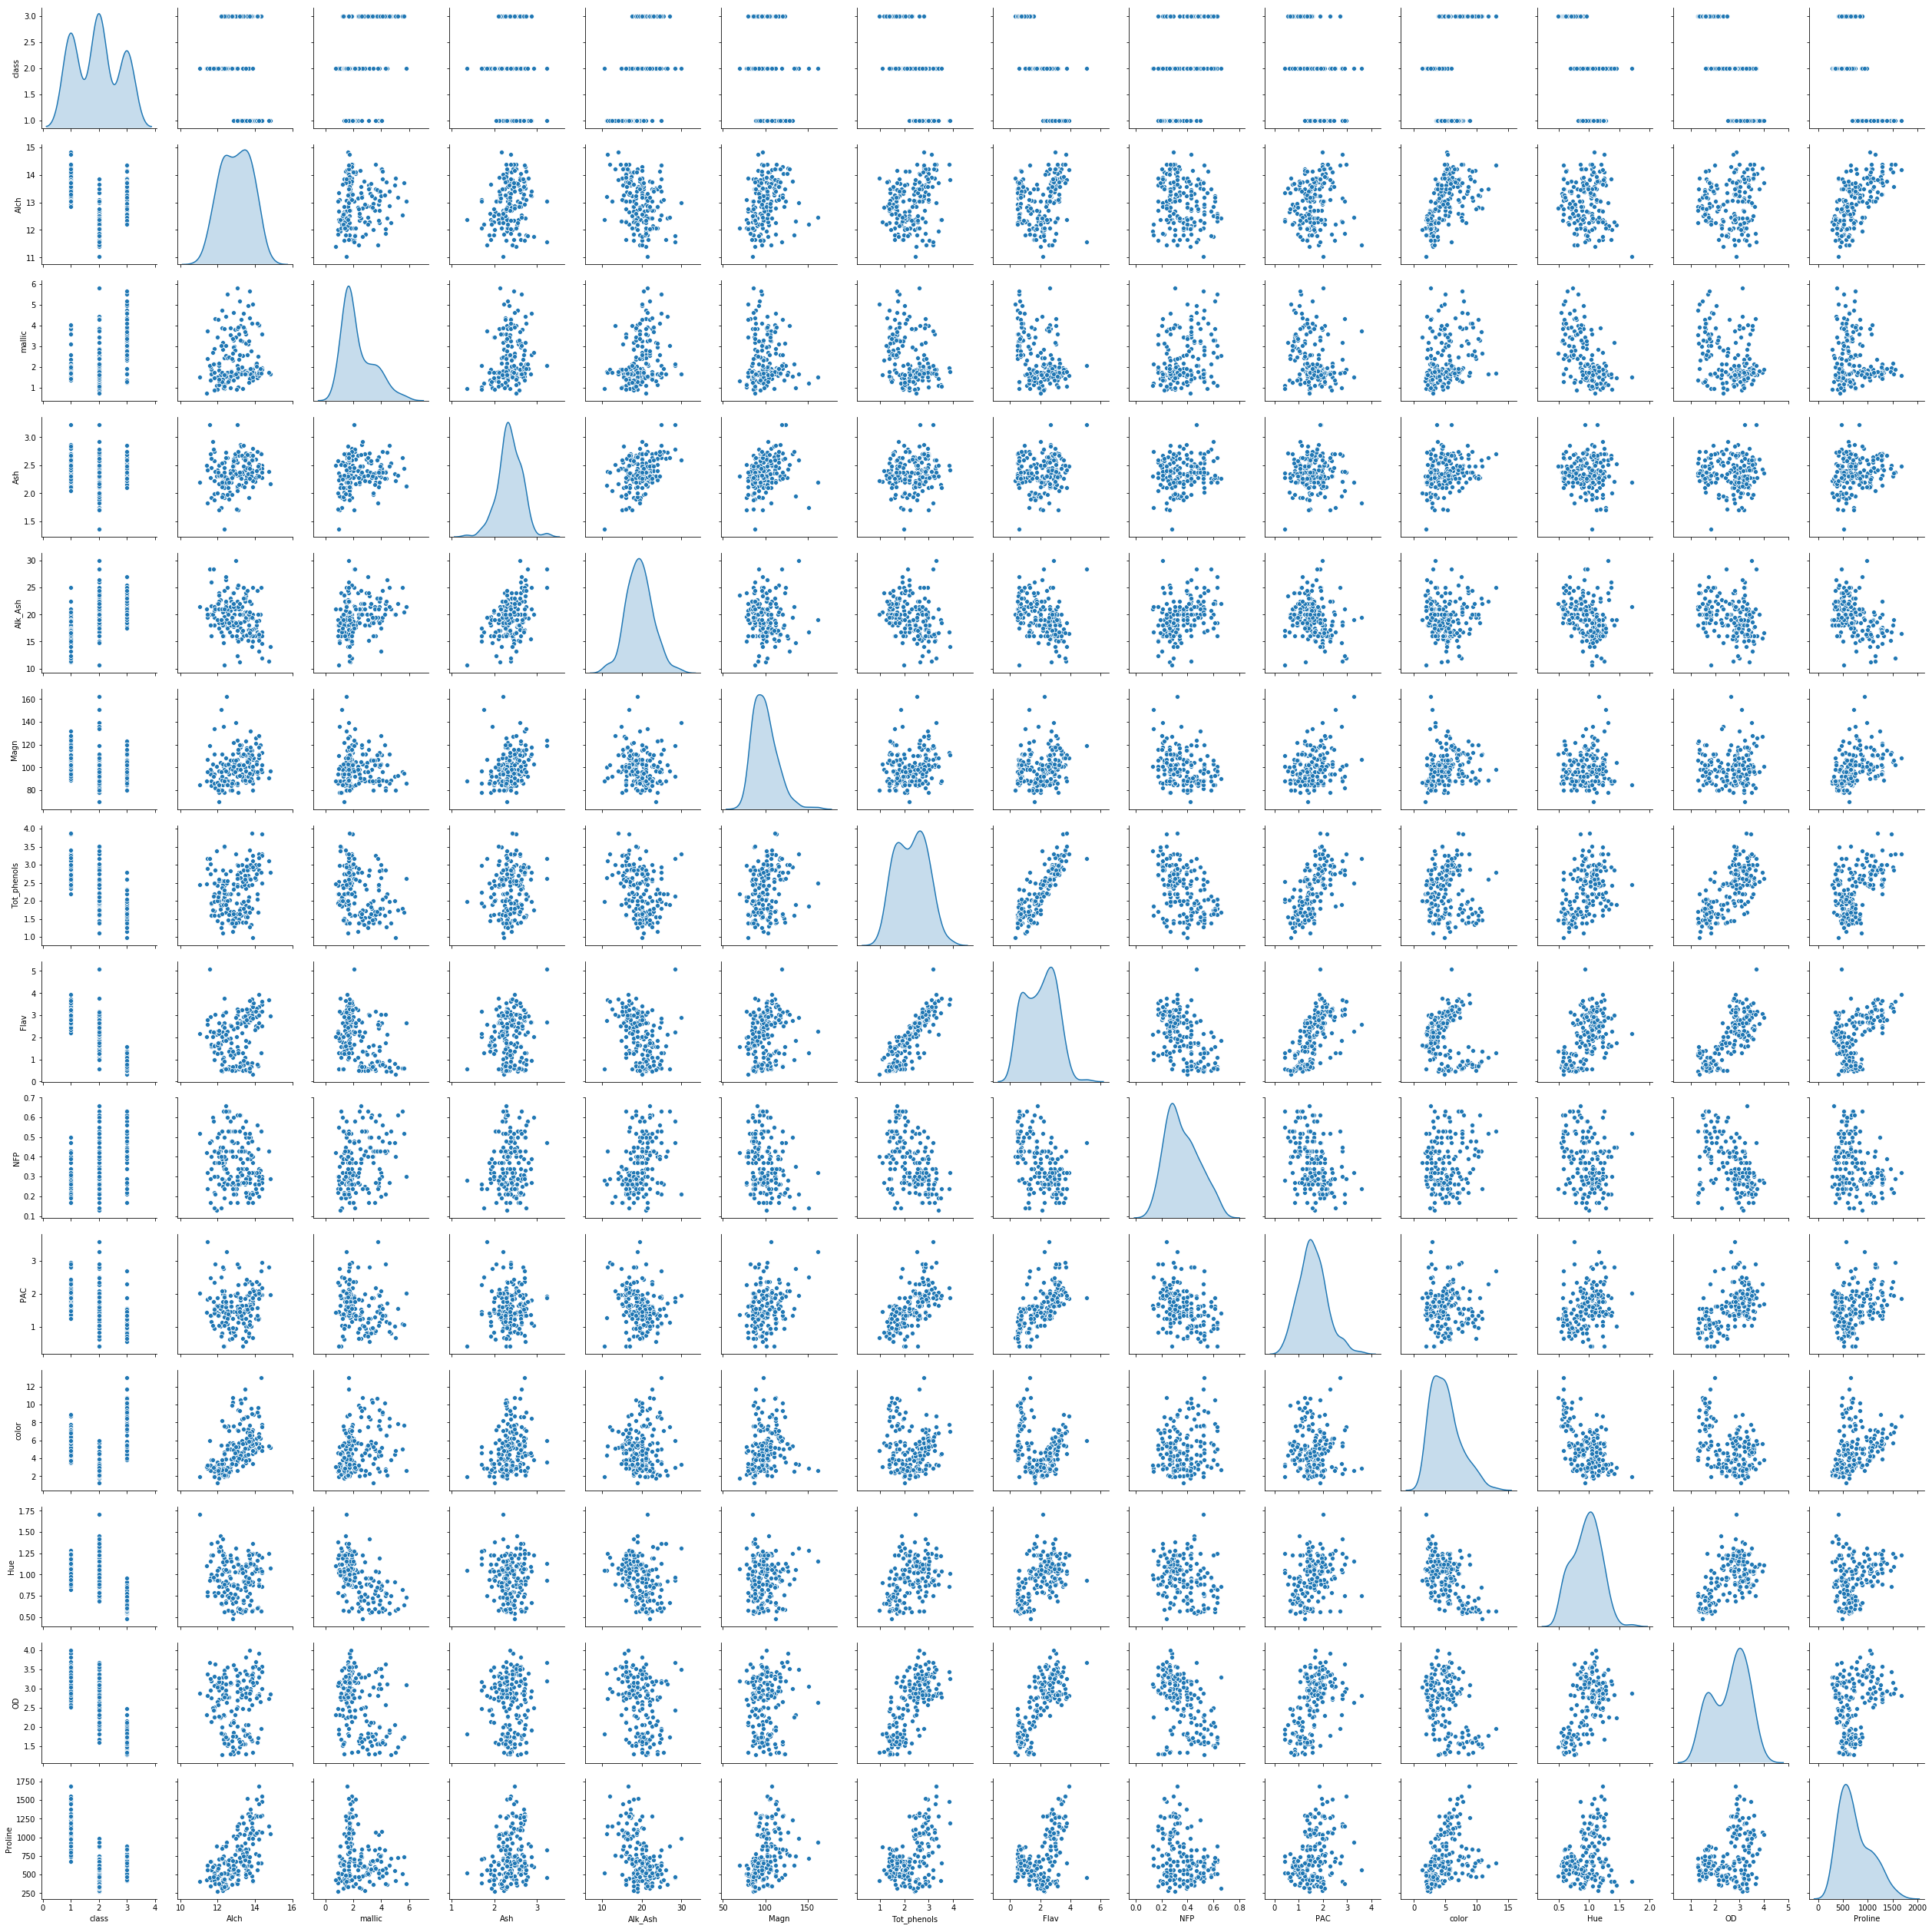

In [14]:
sns.pairplot(A,diag_kind='kde')

In [15]:
A.corr()

,class,Alch,mallic,Ash,Alk_Ash,Magn,Tot_phenols,Flav,NFP,PAC,color,Hue,OD,Proline
class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alch,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
mallic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alk_Ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magn,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Tot_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flav,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
NFP,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
PAC,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [36]:
from sklearn.model_selection import cross_val_score

In [43]:
model=LogisticRegression()
acc=cross_val_score(model,X,Y,cv=3)
print(acc.mean())
print(acc.var())

0.9388888888888888
0.0030246913580246892


/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda/python3/lib/python3.6/site-package

In [65]:
model.fit(X,Y)
pred=model.predict(X)
cm=metrics.confusion_matrix(Y,pred)
cm[:,0]

/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([57,  0,  0])

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(random_state=0)
LR=LogisticRegression()
NB=GaussianNB()

In [26]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3,shuffle=True,random_state=2)
for model, name in zip([LR,NB,DT], ['Logistic','NaiveBayes','DecisionTree']):
    k=0
    recall=np.zeros((3,3))
    prec=np.zeros((3,3))
    fscore=np.zeros((3,3))
    for train,test in kf.split(X,Y):
        Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]
        Ytrain,Ytest=Y[train],Y[test]
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        #acc.append(metrics.accuracy_score(Ytest,Y_predict))
        cm=metrics.confusion_matrix(Ytest,Y_predict)
        for i in np.arange(0,3):
            recall[i,k]=cm[i,i]/cm[i,:].sum()
        for i in np.arange(0,3):
            prec[i,k]=cm[i,i]/cm[:,i].sum()
        k=k+1
    for row in np.arange(0,3):
        for col in np.arange(0,3):
            fscore[row,col]=2*(recall[row,col]*prec[row,col])/(recall[row,col]+prec[row,col])
    print("f1_weighted for class1: %0.02f (+/- %0.5f) [%s]" % (np.mean(fscore[0,:]), np.var(fscore[0,:],ddof=1), name ))   
    print("f1_weighted for class2: %0.02f (+/- %0.5f) [%s]" % (np.mean(fscore[1,:]), np.var(fscore[1,:],ddof=1), name ))   
    print("f1_weighted for class3: %0.02f (+/- %0.5f) [%s]" % (np.mean(fscore[2,:]), np.var(fscore[2,:],ddof=1), name ))   
    

f1_weighted for class1: 0.96 (+/- 0.00043) [Logistic]
f1_weighted for class2: 0.94 (+/- 0.00043) [Logistic]
f1_weighted for class3: 0.96 (+/- 0.00013) [Logistic]
f1_weighted for class1: 0.97 (+/- 0.00104) [NaiveBayes]
f1_weighted for class2: 0.96 (+/- 0.00189) [NaiveBayes]
f1_weighted for class3: 0.98 (+/- 0.00044) [NaiveBayes]
f1_weighted for class1: 0.91 (+/- 0.00060) [DecisionTree]
f1_weighted for class2: 0.85 (+/- 0.00747) [DecisionTree]
f1_weighted for class3: 0.88 (+/- 0.00601) [DecisionTree]


/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda/python3/lib/python3.6/site-package